In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import time
from memory_profiler import memory_usage

In [2]:
data = pd.read_csv("/Users/shreyasmishra/Downloads/smoking_drinking_dataset.csv")
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [3]:
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

In [5]:
data.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [6]:
data.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
#Mapping the target variable to numeric value 0 and 1
mapping_DRK_YN = {"Y" : 1, "N" : 0}
mapping_sex = {"Male" : 1, "Female" : 0}
data['DRK_YN'] = data['DRK_YN'].astype(str).map(mapping_DRK_YN)
data['sex'] = data['sex'].astype(str).map(mapping_sex)
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,1,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,1,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,1,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,1,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0


In [8]:
correlation = data.corr(numeric_only=True)

<Axes: >

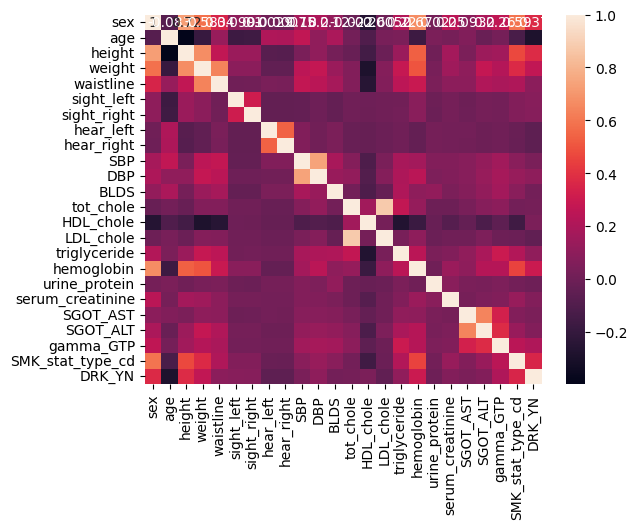

In [9]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

The heatmap above shows little or no correlation between most of the features provided. There are some features which have a decent correlation, but those are based on physical facts such as the correlation between systolic and diastolic blood pressure and the correlation between hear_right and hear_left. The cholesterol values also display decent correlation amongst themselves. One of the important correlations we observe is that of hemoglobin with smoking type. 

<Axes: xlabel='hemoglobin', ylabel='SMK_stat_type_cd'>

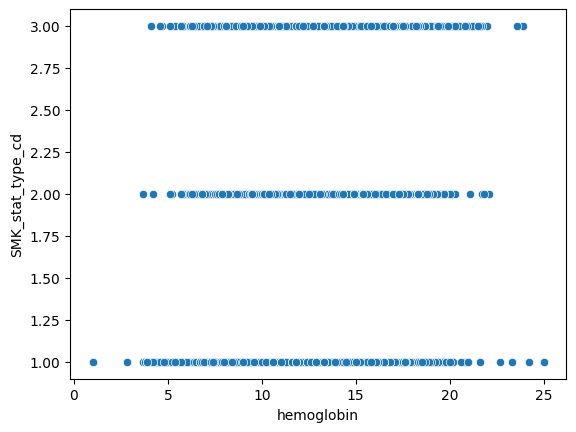

In [10]:
#We are observing the relation between hemoglobin and SMK_stat_type_cd

sns.scatterplot(x = 'hemoglobin', y = 'SMK_stat_type_cd', data=data)

As we can see, there are some outliers present in the relation between hemoglobin and SMK_stat_type_cd.

In [11]:
#Separating the significant numerical valued columns from the categorical columns
sig_columns = ['height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP'
               , 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 
               'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

In [12]:
X = data.drop(["DRK_YN"], axis=1)
y = data["DRK_YN"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

outliers = X_test[y_pred == 1]

outlier_indices = np.where(y_pred==1)

X_clean = np.delete(X_test, outlier_indices, axis=0)
y_clean = np.delete(y_test, outlier_indices)


In [14]:
#Applying models on the cleaned data
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

model_times = {}
model_memory = {}


for model_name, model in models.items():

    start_time = time.time()

    mem_usage = memory_usage((model.fit, (X_train, y_train)), interval=0.1, max_usage=True)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    model_times[model_name] = elapsed_time
    model_memory[model_name] = mem_usage
    
    acc = accuracy_score(y_test, y_pred)
    classif_rep = classification_report(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print(f"Model : {model_name}")
    print(f"Accuracy : {acc}")
    print("Classification Report: \n", classif_rep)
    print("Confusion Matrix: \n", conf_mat)

for model_name, elapsed_time in model_times.items():
    max_memory = model_memory[model_name]
    print(f"Model: {model_name}")
    print(f"Elapsed Time: {elapsed_time:.4f} seconds")
    print(f"Max Memory Usage: {max_memory:.2f} MB")
    print("="*50)

Model : Logistic Regression
Accuracy : 0.7249256064961921
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73     99595
           1       0.73      0.72      0.72     98675

    accuracy                           0.72    198270
   macro avg       0.72      0.72      0.72    198270
weighted avg       0.72      0.72      0.72    198270

Confusion Matrix: 
 [[72808 26787]
 [27752 70923]]
Model : Decision Tree
Accuracy : 0.6465072880415594
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65     99595
           1       0.64      0.64      0.64     98675

    accuracy                           0.65    198270
   macro avg       0.65      0.65      0.65    198270
weighted avg       0.65      0.65      0.65    198270

Confusion Matrix: 
 [[64593 35002]
 [35085 63590]]
Model : Random Forest Classifier
Accuracy : 0.7337469107782317
Classification Report